# LINKS

- ## [join/merge DF python pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)


---

In [1]:
import os, sys, time
from time import sleep
from pathlib import Path
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pyodbc

In [3]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
# [2020-02-19]]\\import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tempfile

## *FUNCTIONS*

In [6]:
def send_mail(send_from, send_to, subject, message, files=[],
              server="cos.smtp.agilent.com", port=587, use_tls=True):  # {
    print("SENDING MAIL... DATE == " + str(pd.Timestamp.now())[:10])
    msg = MIMEMultipart()
    msg['From'] = send_from
    msg['To'] = COMMASPACE.join(send_to)
    msg['Date'] = formatdate(localtime=True)
    msg['Subject'] = subject

    msg.attach(MIMEText(message))

    for path in files:  # {
        part = MIMEBase('application', "octet-stream")
        with open(path, 'rb') as file:  # {
            part.set_payload(file.read())
        # }
        encoders.encode_base64(part)
        part.add_header('Content-Disposition',
                        'attachment; filename="{}"'.format(op.basename(path)))
        msg.attach(part)
    # }

    smtp = smtplib.SMTP(server, port)
    if use_tls:  # {
        smtp.starttls()
    # }
    smtp.sendmail(send_from, send_to, msg.as_string())
    smtp.quit()
# }

In [7]:
def pull_prodflow_data(table_name): # {
    pass
# }

In [8]:
def push_prodflow_data(table_name): # {
    pass
# }

## Ask for `Email Address`:

## Ask for `Date`:

In [9]:
date_input = input("Input a Date:")

Input a Date: 2020-02-27


In [10]:
# the_date = pd.Timestamp.now()
test_date = pd.Timestamp(ts_input=str(date_input))
print(test_date)

2020-02-27 00:00:00


In [11]:
td_one_month_ago = test_date - pd.Timedelta(unit='M', value=1)
print(td_one_month_ago)

2020-01-27 13:30:54


C:\Users\derbates\miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
one_month_ago = test_date - timedelta(days = 30)

In [13]:
print("ONE MONTH AGO == " + str(one_month_ago))

ONE MONTH AGO == 2020-01-28 00:00:00


In [14]:
# DAILY METRICS
# df_week_range = pd.date_range(start=one_month_ago, end=test_date, freq="M-SAT")
df_month_range = pd.date_range(start=one_month_ago, end=test_date, freq='D') #, periods=30)

In [15]:
type(df_month_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
list(df_month_range)

[Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp('2020-02-06 00:00:00', freq='D'),
 Timestamp('2020-02-07 00:00:00', freq='D'),
 Timestamp('2020-02-08 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-02-10 00:00:00', freq='D'),
 Timestamp('2020-02-11 00:00:00', freq='D'),
 Timestamp('2020-02-12 00:00:00', freq='D'),
 Timestamp('2020-02-13 00:00:00', freq='D'),
 Timestamp('2020-02-14 00:00:00', freq='D'),
 Timestamp('2020-02-15 00:00:00', freq='D'),
 Timestamp('2020-02-16 00:00:00', freq='D'),
 Timestamp('2020-02-17 00:00:00', freq='D'),
 Timestamp('2020-02-18 00:00:00', freq='D'),
 Timestamp

In [17]:
df_month_range = pd.DataFrame(pd.Series(df_month_range), columns=['QCDate'])

In [18]:
print(df_month_range)

       QCDate
0  2020-01-28
1  2020-01-29
2  2020-01-30
3  2020-01-31
4  2020-02-01
5  2020-02-02
6  2020-02-03
7  2020-02-04
8  2020-02-05
9  2020-02-06
10 2020-02-07
11 2020-02-08
12 2020-02-09
13 2020-02-10
14 2020-02-11
15 2020-02-12
16 2020-02-13
17 2020-02-14
18 2020-02-15
19 2020-02-16
20 2020-02-17
21 2020-02-18
22 2020-02-19
23 2020-02-20
24 2020-02-21
25 2020-02-22
26 2020-02-23
27 2020-02-24
28 2020-02-25
29 2020-02-26
30 2020-02-27


In [19]:
type(df_month_range)

pandas.core.frame.DataFrame

In [20]:
df_month_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
QCDate    31 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.0 bytes


In [21]:
# MONTHLY METRICS
year_range = pd.date_range(end=test_date, freq='M', periods=12, name='QCDate')

In [22]:
print(year_range)

DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', freq='M')


---
### create *connection string* for [`SQL-Server`][`ProdflowII_Prod`] (for `Products` Table)
#### called `cnxn_Prodflow`

In [23]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlowII_Prod;'
    r'Trusted_Connection=yes;'
)

try: #{
    cnxn_Prodflow = pyodbc.connect(conn_str)
    crsr_Prodflow = cnxn_Prodflow.cursor()
#}
except: #{
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
#}
else: #{
    print("FIN...")
#}

FIN...


### create *connection string* for [`SQL-Server`][`Prodflow`] (for `tblProdflow` table)
#### called `cnxn_Prodflow2`

In [24]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlow;'
    r'Trusted_Connection=yes;'
)

try: # {
    cnxn_Prodflow2 = pyodbc.connect(conn_str)
    crsr_Prodflow2 = cnxn_Prodflow2.cursor()
# }
except: # { 
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("FIN...")
# }

FIN...


## `PRODUCTS` Table

In [25]:
# TRY THE FOLLOWING
try: # {
    df_products = pd.read_sql_query(sql='SELECT * FROM Products', con=cnxn_Prodflow)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_products.info())
    # [2020-02-25]\\print(products_info)
    # [2020-02-25]\\products_info.to_csv("products_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108331 entries, 0 to 108330
Data columns (total 42 columns):
ProductID          108331 non-null int64
Product#           108331 non-null object
ProductName        108303 non-null object
LineID             108331 non-null int64
Description        5973 non-null object
Specials           2443 non-null object
OriginationDate    107937 non-null datetime64[ns]
EntryDate          108329 non-null datetime64[ns]
Status             6036 non-null object
MatrixNumber       107447 non-null object
Components         108331 non-null int64
Availability       4843 non-null object
EquivalentSoln     102887 non-null object
EquivalentNeat     103045 non-null object
Packaging          107533 non-null object
Storage            100703 non-null object
ExpirationDate     108306 non-null float64
ShipType           95129 non-null object
UN#                93446 non-null object
ShipClass          87354 non-null object
PackGrp   

## `tblProdflow` Table

In [26]:
# TRY THE FOLLOWING
try: # {
    df_tblProdflow = pd.read_sql_query(sql='SELECT * FROM tblProdflow', 
                                       parse_dates = ['QCDate'],
                                       con=cnxn_Prodflow2)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_tblProdflow.info())
    # [2020-02-25]\\print(tblProdflow_info)
    # [2020-02-25]\\tblProdflow_info.to_csv("tblProdflow_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108628 entries, 0 to 108627
Data columns (total 53 columns):
PfIDNo              108628 non-null int64
PfBatchID           108628 non-null object
ProductNo           108609 non-null object
OrdID               92496 non-null float64
QuoteNo             108592 non-null object
PfSentTo            108563 non-null object
PrepDate            107614 non-null datetime64[ns]
PrepVolume          108583 non-null float64
PrepUnit            108552 non-null object
PrepVessel          108549 non-null float64
PrepVBarcode        57942 non-null object
PrdSaleUnit         89403 non-null object
PrepMatrixNo        108553 non-null object
PrepMatrixLot       107685 non-null object
PrepInits           107444 non-null object
PrepMemo            61236 non-null object
PrepNotebookRef     48969 non-null object
BulkQCStatus        24 non-null object
BulkQCDate          74980 non-null datetime64[ns]
BulkPassFail        74086 no

### Rename Header Column in `Products` Table

In [27]:
df_products.rename(columns={'Product#': 'ProductNo'}, inplace=True)

In [28]:
df_products.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,MatrixNotes,RecipeId,RushPriority,IsVoided,SagePartNumber,ProductLevel,DateInserted,CofATemplate,UniqueRequestID,Test_Timestamp
96301,75582,QTE-75582,Custom Standard,7,None,None,2014-08-31,2014-08-31,None,JHP-040,...,None,RP-36598,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00!>#'
99874,91179,QTE-91179,Custom Standard,7,None,None,2016-07-27,2016-07-27,None,JHP-003,...,None,RP-11038,False,VOID,None,NaN,NaT,None,None,b'\x00\x00\x00\x00\x00!L&'
91748,67414,QTE-67414,Custom Standard,7,None,None,2013-09-30,2013-09-30,None,JHP-021,...,None,RP-49839,False,VOID,None,3.0,NaT,None,None,b'\x00\x00\x00\x00\x00!\xae\xe0'
98482,87185,QTE-87185,8270 Calibration Mix #3,7,None,None,2016-03-31,2016-03-31,None,JHP-031,...,None,RP-53356,False,VOID,None,NaN,NaT,None,None,b'\x00\x00\x00\x00\x00!F\xb0'
52337,91135,QCC-00369,beta-BHC @ 10 ng/mL in hexane,5,None,None,2016-07-26,2016-07-26,None,JHP-014,...,None,RP-26931,False,None,None,NaN,NaT,None,None,b'\x00\x00\x00\x00\x00 \x91\xd9'


---
## **CREATE** `df_QCMetrics` Table (calculations table)

In [29]:
#inner join in python pandas
df_QCMetrics = pd.merge(df_products, df_tblProdflow, on='ProductNo', how='right')
len(df_QCMetrics)

108628

In [30]:
# COPY FOR TESTING
TEST_METRICS = pd.DataFrame(data=df_QCMetrics)
TEST_METRICS.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
30726,92914.0,CUS-22855-1,Custom Standard,7.0,None,None,2016-11-10,2016-11-10,None,JHP-003,...,1.0,32.0,None,1.0,None,False,False,None,None,None
40576,12037.0,CUS-6045,Custom Standard,7.0,None,None,2004-11-09,2011-05-09,None,JHP-021,...,1.0,32.0,None,1.0,None,False,True,None,None,None
77040,19893.0,PST-2015I100,Omethoate Solution,7.0,None,None,2006-06-07,2011-05-09,None,JHP-018,...,1.0,1.0,current with 25 mL in bulk,1.0,None,False,True,None,None,None
54999,9212.0,G1969-85026-X,Flushing Solvent,20.0,None,None,2004-07-12,2004-07-12,None,JHP-035,...,2.0,43.0,None,2.0,None,False,True,None,None,None
107892,NaN,CUS-2714-2,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,2.0,NaN,None,2.0,None,False,True,None,None,None


### Drop **ALL** rows without a `QCDate` & `QCValidation` 

In [31]:
df_QCMetrics.dropna(axis=0, subset=['QCDate', 'QCValidation'], how='any', inplace=True)
# [2020-02-24]\\df_QCMetrics.dropna(axis=0, subset=['QCDate', 'ProductLevel'], how='any', inplace=True)
len(df_QCMetrics)

103167

In [32]:
type(df_month_range)

pandas.core.frame.DataFrame

#### TEST_METRICS (dataframe)

In [33]:
# CONVERT from string to datetime
TEST_METRICS['QCDate'] = pd.to_datetime(TEST_METRICS['QCDate'])

In [34]:
# CONVERT FROM string to categorical
TEST_METRICS['QCValidation'] = pd.Categorical(TEST_METRICS["QCValidation"], ordered=False)

In [35]:
# SET ['QCDate'] & ['QCValidation'] as the INDEX and delete COLUMNS
# [2020-02-24]\\TEST_METRICS.set_index([TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']])
TEST_METRICS.index = [TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']]
del TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']
TEST_METRICS.sample(5)

,,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCFullValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,QCValidation,,,,,,,,,,,,,,,,,,,,,
2012-03-22,1.0,55555.0,CUS-13866,Custom Standard,7.0,None,None,2012-03-09,2012-03-09,None,JHP-040,...,False,42.0,None,1.0,None,False,True,None,None,None
2019-02-27,2.0,6649.0,PPS-410-1,"2',4',5'-Trifluoroacetophenone Standard",1.0,"1 analyte @ 10,000 µg/mL in acetonitrile",None,2000-07-26,2011-05-09,active,JHP-003,...,False,8.0,None,2.0,None,False,False,None,None,None
2008-06-13,1.0,17964.0,PST-190M100,Dichloran Solution,7.0,None,None,2006-03-08,2011-05-09,None,JHP-021,...,False,45.0,1 x 4.5 mL certan,1.0,None,False,True,None,None,None
NaT,2.0,74032.0,STK-02163,Cobalt 100,17.0,None,None,2014-07-11,2014-07-11,None,JHP-045,...,False,NaN,None,2.0,None,False,False,None,None,None
2000-03-17,2.0,6597.0,PPM-828-1,Organochlorine Pesticides Standard,1.0,"3 analytes @ 250 µg/mL in isooctane (2,2,4-tri...",None,1999-01-20,2011-05-09,active,JHP-018,...,True,NaN,None,2.0,None,False,True,None,None,None


In [36]:
TEST_METRICS.groupby(TEST_METRICS.index)['PfBatchID'].count()

(1987-01-01 00:00:00, 1.0)     2
(1989-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 2.0)     3
(1992-01-01 00:00:00, 1.0)     1
                              ..
(2020-02-25 00:00:00, 1.0)    30
(2020-02-26 00:00:00, 1.0)    33
(2020-02-26 00:00:00, 3.0)     2
(2020-02-27 00:00:00, 1.0)    29
(NaT, nan)                     1
Name: PfBatchID, Length: 11055, dtype: int64

In [37]:
try: # {
    TEST_METRICS.resample("D").count()
# }
except: # {
    print("FAIL!\n\nTypeError:\n\tOnly valid with:\n\t\tDatetimeIndex,\n\t\tTimedeltaIndex,\n\t\tPeriodIndex;\n\t\t\tbut got an instance of 'MultiIndex'")
# }

FAIL!

TypeError:
	Only valid with:
		DatetimeIndex,
		TimedeltaIndex,
		PeriodIndex;
			but got an instance of 'MultiIndex'


In [38]:
TEST_METRICS.to_csv("test_METRICS_index.csv", index=True)

---
# CHANGE `index` of `df_QCMetrics`:

---
## *BEFORE setting `index`:*

In [39]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
96069,79694.0,STK-02433,CUS-16996 B 100 µg/mL in Acetonitrile Stock,16.0,None,None,2015-03-03,2015-03-03,None,JHP-003,...,1.0,NaN,None,14.0,None,True,False,None,None,None
28337,78158.0,CUS-16611,Custom Standard,7.0,None,None,2015-01-09,2015-01-09,None,JHP-018,...,1.0,1.0,None,1.0,None,False,False,None,None,None
41541,13690.0,CUS-6472,Custom Standard,7.0,None,None,2005-03-16,2011-05-09,None,JHP-031,...,1.0,17.0,None,1.0,None,False,True,None,None,None
80939,28499.0,PST-3280K100,Terbumeton Solution,7.0,None,None,2007-11-05,2011-05-09,None,JHP-001,...,1.0,49.0,1 x 1 mL,1.0,None,False,True,None,None,None
19339,47022.0,CUS-12678,Custom Standard,7.0,None,None,2010-10-19,2011-05-09,None,JHP-021,...,1.0,69.0,None,1.0,None,False,True,None,None,None


### Convert `QCMetrics`['QCDate'] from `str` to `datetime`

In [40]:
# Convert "QCMetrics"['QCDate'] from string to datetime
df_QCMetrics['QCDate'] = pd.to_datetime(df_QCMetrics['QCDate'])

### set `index` of `df_QCMetrics` to be `QCDate` (after changing `dtype`)

In [41]:
# set "QCmetrics""['QCDate'] as the index and delete column
df_QCMetrics.index = df_QCMetrics['QCDate']
del df_QCMetrics['QCDate']

---
## *AFTER setting `index`:*

In [42]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2016-03-17,57834.0,LECO-022-14,Custom Standard,7.0,None,None,2012-06-05,2012-06-05,None,JHP-018,...,2.0,33.0,None,2.0,None,False,False,None,None,None
2002-06-24,7053.0,QCM-135-4,ULTRAcheck EDB / DBCP Sample,4.0,2 analytes in concentrate,*New Product*,2002-04-18,2011-05-09,active,JHP-021,...,2.0,NaN,None,2.0,None,False,True,None,None,None
2016-06-27,51688.0,CUS-13261,Custom Standard,7.0,None,None,2011-07-06,2011-07-06,None,JHP-021,...,1.0,31.0,None,1.0,None,False,False,None,None,None
2019-09-16,79377.0,BLK-WRK-145Q,L-Tryptophan Standard,1.0,None,None,2015-02-17,2015-02-17,None,JHP-040,...,2.0,50.0,None,2.0,None,False,False,None,None,None
2000-07-19,7725.0,WAT042881-3,Waters Absorbance Detector Linearity Calibrati...,7.0,None,None,1996-02-05,2011-05-09,oem,JHP-021,...,1.0,NaN,None,2.0,None,False,True,None,None,None


---
# create `df_last_month` DataFrame

---
### View Observations between One Month Ago and Today

In [43]:
df_last_month = df_QCMetrics[str(one_month_ago):str(test_date)]
len(df_last_month)
# [2020-02-22]\\df_last_month.to_csv("last_month.csv", index=True)

631

In [44]:
df_last_month.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2020-02-25,31504.0,ICUS-2356,Custom Standard,8.0,None,None,2008-05-08,2008-05-08,None,JHP-377,...,1.0,3.0,None,1.0,None,False,False,None,None,None
2020-01-28,7229.0,RPC-006S,2-Chlorobiphenyl Standard (BZ-1),1.0,1 analyte @ 100 µg/mL in hexane,BZ # 1,1999-01-20,2011-05-09,active,JHP-014,...,1.0,30.0,Quarantine cj-4339 (24),1.0,None,False,False,None,None,None
2020-02-20,78597.0,CUS-16831,Custom Standard,7.0,None,None,2015-01-30,2015-01-30,None,JHP-021,...,1.0,20.0,Quarantine 0006466433 [58] & 0006466781 [53] r...,1.0,None,False,False,None,None,None
2020-02-07,114034.0,STK-03793,50x stock for CUS-00002185,16.0,None,None,2020-02-06,2020-02-06,None,JHP-003,...,1.0,NaN,no action,14.0,None,True,False,None,None,None
2020-01-31,6524.0,PP-291-1,Aroclor 1221 Standard,1.0,1 analyte @ 100 µg/mL in hexane,None,1999-01-20,2011-05-09,active,JHP-014,...,1.0,140.0,None,1.0,None,False,False,None,None,None


In [45]:
df_last_month.index

DatetimeIndex(['2020-01-28', '2020-02-19', '2020-02-07', '2020-02-18',
               '2020-02-25', '2020-02-24', '2020-01-30', '2020-01-30',
               '2020-02-05', '2020-02-13',
               ...
               '2020-02-21', '2020-02-04', '2020-01-29', '2020-02-26',
               '2020-02-26', '2020-02-18', '2020-02-06', '2020-02-07',
               '2020-02-19', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', length=631, freq=None)

---
# create `df_daily_levels` frame

---

## GroupBy ([df_last_month.index, 'QCValidation'])['PfBatchID']

### TEST `CATEGORICAL-INDEX` BELOW:

In [46]:
''' Groupby single column in pandas python'''
df_last_month.groupby(df_last_month.index)['PfBatchID'].count()

QCDate
2020-01-28    14
2020-01-29    24
2020-01-30    22
2020-01-31     8
2020-02-03    13
2020-02-04    33
2020-02-05    24
2020-02-06    42
2020-02-07    32
2020-02-08     2
2020-02-10    47
2020-02-11    41
2020-02-12    24
2020-02-13    34
2020-02-14    24
2020-02-15     2
2020-02-18    31
2020-02-19    37
2020-02-20    29
2020-02-21    36
2020-02-24    18
2020-02-25    30
2020-02-26    35
2020-02-27    29
Name: PfBatchID, dtype: int64

In [47]:
''' Groupby multiple columns '''
df_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index,'QCValidation'])['PfBatchID'].count())
# [2020-02-24]\\f_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index, 'ProductLevel'])['PfBatchID'].count())
# RENAME COLUMNS
df_daily_levels.rename(columns={'PfBatchID': 'Count'}, inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              40
           3.0               2
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              46
           3.0               1
2020-02-11 1.0              41
2020-02-12 1.0              24
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0              24
2020-02-15 1.0               2
2020-02-18 1.0              29
           2.0               1
           3.0               1
2020-02-19 1.0              37
2020-02-20 1.0              29
2020-02-21 1.0              36
2020-02-24 1.0              14
           2.0               2
           3.0               2
2020-02-25 1.0              30
2020-02-26 1.0              33
           3.0               2
2020-02-27 1.0              29

#### SORT INDEX

In [48]:
df_daily_levels.sort_index(inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              40
           3.0               2
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              46
           3.0               1
2020-02-11 1.0              41
2020-02-12 1.0              24
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0              24
2020-02-15 1.0               2
2020-02-18 1.0              29
           2.0               1
           3.0               1
2020-02-19 1.0              37
2020-02-20 1.0              29
2020-02-21 1.0              36
2020-02-24 1.0              14
           2.0               2
           3.0               2
2020-02-25 1.0              30
2020-02-26 1.0              33
           3.0               2
2020-02-27 1.0              29

In [49]:
df_daily_levels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37 entries, (2020-01-28 00:00:00, 1.0) to (2020-02-27 00:00:00, 1.0)
Data columns (total 1 columns):
Count    37 non-null int64
dtypes: int64(1)
memory usage: 702.0 bytes


In [50]:
df_daily_levels.T

QCDate       2020-01-28 2020-01-29 2020-01-30     2020-01-31 2020-02-03      \
QCValidation        1.0        1.0        1.0 2.0        1.0        1.0 2.0   
Count                14         24         21   1          8         10   1   

QCDate           2020-02-04 2020-02-05  ... 2020-02-19 2020-02-20 2020-02-21  \
QCValidation 3.0        1.0        1.0  ...        1.0        1.0        1.0   
Count          2         33         23  ...         37         29         36   

QCDate       2020-02-24         2020-02-25 2020-02-26     2020-02-27  
QCValidation        1.0 2.0 3.0        1.0        1.0 3.0        1.0  
Count                14   2   2         30         33   2         29  

[1 rows x 37 columns]

In [51]:
df_daily_levels.T.to_csv("df_daily_levels_TRANPOSE.csv")

In [52]:
df_daily_levels.to_csv("df_daily_levels_2020_02_25.csv", index=True)

In [53]:
df_daily_levels.T.to_excel("df_daily_level_TRANPOSE.xlsx", index=True)

In [54]:
df_daily_levels.to_excel("df_daily_levels_2020_02_25.xlsx", index=True)

In [55]:
df_daily_levels.index

MultiIndex([('2020-01-28', 1.0),
            ('2020-01-29', 1.0),
            ('2020-01-30', 1.0),
            ('2020-01-30', 2.0),
            ('2020-01-31', 1.0),
            ('2020-02-03', 1.0),
            ('2020-02-03', 2.0),
            ('2020-02-03', 3.0),
            ('2020-02-04', 1.0),
            ('2020-02-05', 1.0),
            ('2020-02-05', 3.0),
            ('2020-02-06', 1.0),
            ('2020-02-06', 3.0),
            ('2020-02-07', 1.0),
            ('2020-02-07', 2.0),
            ('2020-02-08', 1.0),
            ('2020-02-10', 1.0),
            ('2020-02-10', 3.0),
            ('2020-02-11', 1.0),
            ('2020-02-12', 1.0),
            ('2020-02-13', 1.0),
            ('2020-02-13', 3.0),
            ('2020-02-14', 1.0),
            ('2020-02-15', 1.0),
            ('2020-02-18', 1.0),
            ('2020-02-18', 2.0),
            ('2020-02-18', 3.0),
            ('2020-02-19', 1.0),
            ('2020-02-20', 1.0),
            ('2020-02-21', 1.0),
          

---
### `.unstack()`

#### `unstack` *index* (axis=1)

In [56]:
df_daily_unstacked_1 = df_daily_levels.unstack(level=-1)
df_daily_unstacked_1

Count          
QCValidation   1.0  2.0  3.0
QCDate                      
2020-01-28    14.0  NaN  NaN
2020-01-29    24.0  NaN  NaN
2020-01-30    21.0  1.0  NaN
2020-01-31     8.0  NaN  NaN
2020-02-03    10.0  1.0  2.0
2020-02-04    33.0  NaN  NaN
2020-02-05    23.0  NaN  1.0
2020-02-06    40.0  NaN  2.0
2020-02-07    29.0  3.0  NaN
2020-02-08     2.0  NaN  NaN
2020-02-10    46.0  NaN  1.0
2020-02-11    41.0  NaN  NaN
2020-02-12    24.0  NaN  NaN
2020-02-13    33.0  NaN  1.0
2020-02-14    24.0  NaN  NaN
2020-02-15     2.0  NaN  NaN
2020-02-18    29.0  1.0  1.0
2020-02-19    37.0  NaN  NaN
2020-02-20    29.0  NaN  NaN
2020-02-21    36.0  NaN  NaN
2020-02-24    14.0  2.0  2.0
2020-02-25    30.0  NaN  NaN
2020-02-26    33.0  NaN  2.0
2020-02-27    29.0  NaN  NaN

In [57]:
df_daily_unstacked_1.to_csv("df_daily_levels_2020_02_25_UNSTACKED_level_1.csv", index=True)

In [58]:
df_daily_unstacked_1.to_excel("df_daily_levels_2020_02_25_UNSTACKED_level_1.xlsx", index=True)

In [59]:
len(df_daily_unstacked_1.columns.levels)

2

---
# DROP LEVEL

In [60]:
df_daily_unstacked_1.columns = df_daily_unstacked_1.columns.droplevel()

---

In [61]:
df_daily_unstacked_1

QCValidation,1.0,2.0,3.0
QCDate,,,
2020-01-28,14.0,NaN,NaN
2020-01-29,24.0,NaN,NaN
2020-01-30,21.0,1.0,NaN
2020-01-31,8.0,NaN,NaN
2020-02-03,10.0,1.0,2.0
2020-02-04,33.0,NaN,NaN
2020-02-05,23.0,NaN,1.0
2020-02-06,40.0,NaN,2.0
2020-02-07,29.0,3.0,NaN


In [62]:
df_daily_unstacked_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2020-01-28 to 2020-02-27
Data columns (total 3 columns):
1.0    24 non-null float64
2.0    5 non-null float64
3.0    8 non-null float64
dtypes: float64(3)
memory usage: 768.0 bytes


In [63]:
df_daily_unstacked_1.index

DatetimeIndex(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', name='QCDate', freq=None)

In [64]:
df_daily_unstacked_1.columns

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='QCValidation')

In [65]:
df_daily_unstacked_1.to_excel("df_daily_unstacked_2020_02_25.xlsx", index=True)

### test `fillna()`

In [66]:
df_daily_unstacked_1.fillna(value=0, inplace=True)

In [67]:
df_daily_unstacked_1.sample(10)

QCValidation,1.0,2.0,3.0
QCDate,,,
2020-02-26,33.0,0.0,2.0
2020-02-08,2.0,0.0,0.0
2020-02-04,33.0,0.0,0.0
2020-02-20,29.0,0.0,0.0
2020-02-05,23.0,0.0,1.0
2020-02-18,29.0,1.0,1.0
2020-02-15,2.0,0.0,0.0
2020-02-13,33.0,0.0,1.0
2020-02-06,40.0,0.0,2.0


### locate `values`:

In [68]:
df_daily_unstacked_1.iloc[0, 0]

14.0

In [69]:
df_daily_unstacked_1.iloc[17, 0]

37.0

---
# (SHOW) `PLOT` DATA

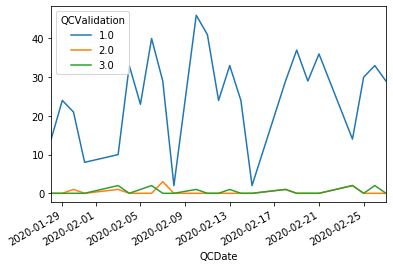

In [70]:
df_daily_unstacked_1.plot()

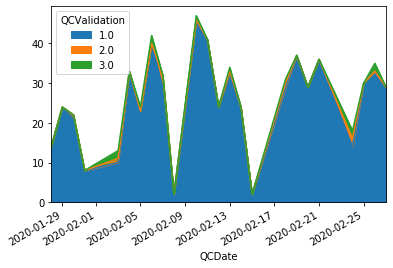

In [71]:
df_daily_unstacked_1.plot(kind='area')

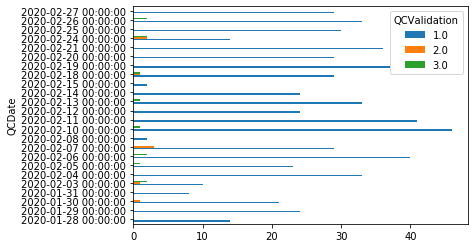

In [72]:
df_daily_unstacked_1.plot(kind='barh')

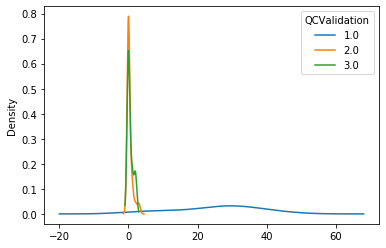

In [73]:
df_daily_unstacked_1.plot(kind='kde')

---
# WorkBook

timestamp for filename

In [74]:
ts_str = str(test_date)[:10] #str(pd.Timestamp.now())[:10]

create filename var

In [75]:
filename_str = str("QCMetrics_" + str(ts_str) + ".xlsx")

In [76]:
# CREATE NEW WORKBOOK
wb = Workbook()
wb.save(filename_str)

In [77]:
# LOAD EXISTING WORKBOOK
wb = load_workbook(filename_str)

In [78]:
# ADD SHEETS TO WORKBOOK
# DESGIGNATE SHEET NAME AND POSITION
sheet1 = wb.create_sheet('Table', 0)
sheet2 = wb.create_sheet('Graphs',1)

In [79]:
# ACTIVATE WORKSHEET TO WRITE DATAFRAME
active = wb['Table']

# WRTIE DATAFRAME TO ACTIVE WORKSHEET
for x in dataframe_to_rows(df_daily_unstacked_1): # {
    active.append(x)
# }

# SAVE 
wb.save(filename_str)

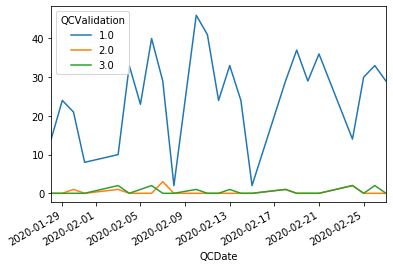

In [80]:
# CREATE LINE PLOT VARIABLE
plot = df_daily_unstacked_1.plot()

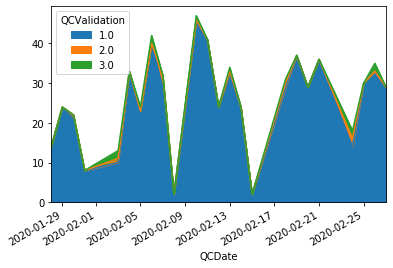

In [81]:
# CREATE AREA PLOT VARIABLE
area_plot = df_daily_unstacked_1.plot(kind='area')

In [82]:
# CREATE BAR PLOT VARIABLE
# [2020-02-27]\\bar_plot = df_daily_unstacked_1.plot(kind='barh')

In [83]:
# CREATE kde PLOT VARIABLE
# [2020-02-27]\\kde_plot = df_daily_unstacked_1.plot(kind='kde')

### create `figure` vairables

In [84]:
# MATPLOTLIB figure for "line_plot"
fig = plot.get_figure()
# MATPLOTLIB figure for "area_plot"
area_fig = area_plot.get_figure()
"""
# MATPLOTLIB figure for "bar_plot"
bar_fig = bar_plot.get_figure()
# MATPLOTLIB figure for "kde_plot"
kde_fig = kde_plot.get_figure()
"""

'\n# MATPLOTLIB figure for "bar_plot"\nbar_fig = bar_plot.get_figure()\n# MATPLOTLIB figure for "kde_plot"\nkde_fig = kde_plot.get_figure()\n'

In [85]:
# SAVE LINE PLOT
fig.savefig(ts_str + "_line_plot.png")
# SAVE AREA PLOT
area_fig.savefig(ts_str + "_area_plot.png")
"""
# SAVE BAR PLOT
bar_fig.savefig(ts_str + "_bar_plot.png")
# SAVE KDE PLOT
kde_fig.savefig(ts_str + "_kde_plot.png")
"""

'\n# SAVE BAR PLOT\nbar_fig.savefig(ts_str + "_bar_plot.png")\n# SAVE KDE PLOT\nkde_fig.savefig(ts_str + "_kde_plot.png")\n'

In [86]:
# ACTIVATE WORKSHEET
active = wb['Graphs']

In [87]:
# Insert Plot into worksheet
# Select active sheet and cell reference
img_line = Image(ts_str + "_line_plot.png")
active.add_image(img_line, 'A1')

In [88]:
# Insert Plot into worksheet
# Select active sheet and cell reference
img_area = Image(ts_str + "_area_plot.png")
active.add_image(img_area, "H1")

In [89]:
# SAVE WORKBOOK
wb.save(filename_str)

In [90]:
# WRITE DATAFRAME TO ACTIVE WORKSHEET

---
# Create *empty* `DataFrame` to hold **FINAL** `Metrics` 
*(and lists to hold columns*)

In [91]:
QCMetrics_Month = pd.DataFrame(data=None,
                              index=pd.date_range(start=one_month_ago,
                                                 end=test_date,
                                                 freq='D',
                                                 name='QCDate'),
                              columns=pd.CategoricalIndex(['L1', 'L2', 'L3'], name='Levels')
                              )

In [92]:
QCMetrics_Month.index

DatetimeIndex(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', name='QCDate', freq='D')

In [93]:
QCMetrics_Month.columns

CategoricalIndex(['L1', 'L2', 'L3'], categories=['L1', 'L2', 'L3'], ordered=False, name='Levels', dtype='category')

In [94]:
QCMetrics_Month

Levels,L1,L2,L3
QCDate,,,
2020-01-28,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN


In [95]:
df_daily_levels.head(5)

Count
QCDate     QCValidation       
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8

In [96]:
result = df_daily_levels.join(QCMetrics_Month, 
                              on = ['QCDate'],
                              how='inner', 
                              sort=True)

In [97]:
result

Count   L1   L2   L3
QCDate     QCValidation                      
2020-01-28 1.0              14  NaN  NaN  NaN
2020-01-29 1.0              24  NaN  NaN  NaN
2020-01-30 1.0              21  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
2020-01-31 1.0               8  NaN  NaN  NaN
2020-02-03 1.0              10  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-04 1.0              33  NaN  NaN  NaN
2020-02-05 1.0              23  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-06 1.0              40  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-07 1.0              29  NaN  NaN  NaN
           2.0               3  NaN  NaN  NaN
2020-02-08 1.0               2  NaN  NaN  NaN
2020-02-10 1.0              46  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-11 1.0              41  NaN  NaN  NaN
2020-02-12 1.0              24  NaN  NaN  NaN
2020-02-13 1.0              33  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-14 1.0              24  NaN  NaN  NaN
2020-02-15 1.0               2  NaN  NaN  NaN
2020-02-18 1.0              29  NaN  NaN  NaN
           2.0               1  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-19 1.0              37  NaN  NaN  NaN
2020-02-20 1.0              29  NaN  NaN  NaN
2020-02-21 1.0              36  NaN  NaN  NaN
2020-02-24 1.0              14  NaN  NaN  NaN
           2.0               2  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-25 1.0              30  NaN  NaN  NaN
2020-02-26 1.0              33  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-27 1.0              29  NaN  NaN  NaN

In [98]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37 entries, (2020-01-28 00:00:00, 1.0) to (2020-02-27 00:00:00, 1.0)
Data columns (total 4 columns):
Count    37 non-null int64
L1       0 non-null object
L2       0 non-null object
L3       0 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


---
# messups

---

# `ExcelWorkBook` functions

In [99]:
# str for filename
filename_str = str(test_date) #str(pd.Timestamp.now())[:10]
print(filename_str)

2020-02-27 00:00:00


In [100]:
# Create new workbook
wb = Workbook()

In [101]:
# Add sheets to workbook
# Designate sheet name and position
sheet1 = wb.create_sheet('sheet1',0)
sheet2 = wb.create_sheet('sheet2',1)
sheet3 = wb.create_sheet('sheet3',2)

In [102]:
# Activate worksheet to write dataframe
active = wb['sheet1']

# Write dataframe to active worksheet
for x in dataframe_to_rows(df_QCMetrics):
    active.append(x)

# Save workbook to write
wb.save(filepath)

KeyError: <class 'pandas._libs.tslibs.nattype.NaTType'>

In [ ]:
wb.save("QCMetrics-"  +  filename_str + ".xlsx")